In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Transformation

## Log Transform

Log transformation is one of the most commonly used mathematical transformations in feature engineering

- It eases handling of skewed data and after transformation, the distribution becomes more approximate to normal
- Decreases the effect of the outliers, due to the normalization of magnitude differences.

**Logarithm Function**:

$\log_{b} (x) = y$, if $b^y = x$

**Example**

In [3]:
x = np.arange(1,100)

ylog10 = np.log10(x)
ylog2 = np.log2(x)
yln = np.log(x)

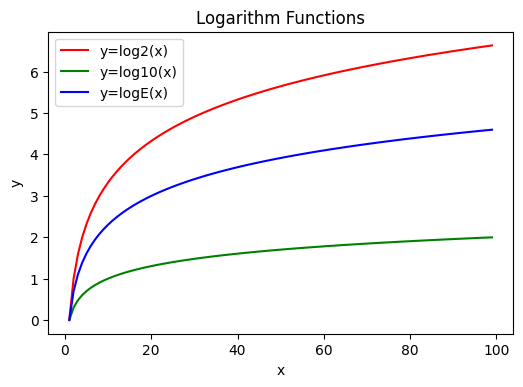

In [4]:
# plot
plt.figure(dpi=100)
plt.plot(x,ylog2,color="red",label="y=log2(x)")
plt.plot(x,ylog10, color="green",label="y=log10(x)")
plt.plot(x,yln,color="blue",label="y=logE(x)")

plt.title('Logarithm Functions')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show() 

## Quantile-based discretization function

**Usage**
- divide customers into 3, 4 or N groupings
- income by quarters
- whenever you need to convert continuous variable into a categorical one.

**pandas implementation**

`qcut()` - Discretize variable into equal-sized buckets
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html

`cut()` like `qcut()`, but here you can specifically define the bin edges
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html`

In [8]:
# make sure the random number are the same (for the same seed)
np.random.seed(42)

# generate 100 random integers, in the interval [1, 100]
x = np.random.randint(1,101, size=100, )
# print(f'x: \n{x}\n')

# bin them into 10 quantiles:
bins = pd.qcut(x,2)
print(f'bins: \n{bins}\n')

values_count = bins.value_counts()
print(f'values_count \n{values_count}')

bins: 
[(1.999, 54.0], (54.0, 100.0], (1.999, 54.0], (54.0, 100.0], (54.0, 100.0], ..., (54.0, 100.0], (54.0, 100.0], (54.0, 100.0], (1.999, 54.0], (1.999, 54.0]]
Length: 100
Categories (2, interval[float64]): [(1.999, 54.0] < (54.0, 100.0]]

values_count 
(1.999, 54.0]    51
(54.0, 100.0]    49
dtype: int64


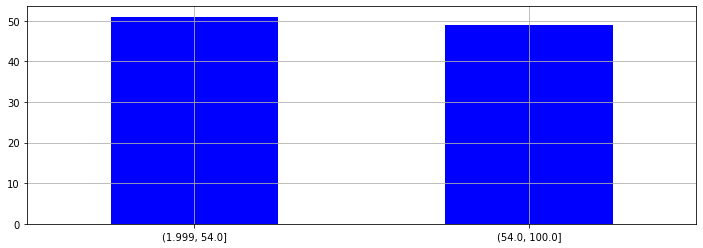

In [9]:
# let's plot our bins:
ax = values_count.plot.bar(rot=0, color="b", figsize=(12,4))

plt.grid(True)
plt.show()

## Transformation of categorical labels into numeric values

### Useful methods

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

In [117]:
# create a very simple DF:
df = pd.DataFrame({
    'gender':['m','f','f','m'],
    'height': [186,164,158,195],    
})
df.head()

,gender,height
0,m,186
1,f,164
2,f,158
3,m,195


In [118]:
# map 'm' to 0, and 'f' to 1:
mappings = {'m':0,'f':1}

df['gender'] = df['gender'].map(mappings)
df

,gender,height
0,0,186
1,1,164
2,1,158
3,0,195


## Feature Normalization and Scaling 

### Standardization

We can not compare (or get useful insight) of measurements that have different units. That's why it's useful to standardize the features - usually **to center the input values arround 0  with a standard deviation of 1**. 

This is also, a general requirement for many machine learning algorithms, and generaly everywhere we want all features to contribute equally, like:

- k-nearest neighbors with an Euclidean distance measure
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. - where the gradient descent optimization is used.
- linear discriminant analysis, principal component analysis, kernel principal component analysis

In practice, for standardization is used the "Z-score normalization" function, which will rescale the feature, so that they’ll have the properties of a standard normal distribution, calculated by:
$$ z = \frac{(x - u)}{s} $$



where **u** is the mean (average) and **s** is the standard deviation from the mean; 
Standard scores (also called z scores) of the samples are calculated for each input value.

Scikit-learn implement the Z-score normalization with the class: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Z-score normalization example**

In [15]:
# generate some data:
N = 100
M = 2

data = np.random.choice(a=100_000, size=(N, M))
df = pd.DataFrame(data)
df.head(3)

,0,1
0,27350,93008
1,94297,25351
2,88668,15305


Normalize the data, using the sklearn StandardScaler class

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
print(scaler.mean_)

df_scaled = scaler.transform(df)
df_scaled[:3,:]


[48018.52 49589.6 ]


array([[-0.768282  ,  1.45951643],
       [ 1.72024525, -0.8147844 ],
       [ 1.5110063 , -1.15248229]])

Plot Initial data vs Scaled data

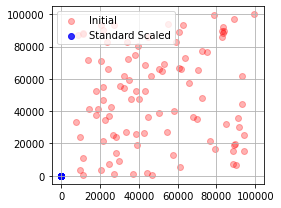

In [17]:
### Scater

plt.figure(figsize=(4,3))
plt.scatter(x=df.iloc[:, 0], y=df.iloc[:, 1], color='red', label='Initial', alpha=0.3)
plt.scatter(x=df_scaled[:, 0], y=df_scaled[:, 1], color='blue', label='Standard Scaled', alpha=0.8)

plt.legend( loc='upper left')
plt.grid()

plt.tight_layout()
# plt.title('random beta distribution')
plt.show()

Text(0.5, 1.0, 'Standard Scaled')

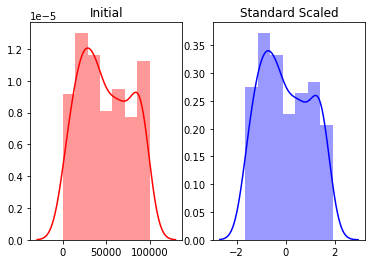

In [18]:
# distribution plot:
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0], color='red')
ax[0].set_title('Initial')

sns.distplot(df_scaled, ax=ax[1], color='blue')
ax[1].set_title('Standard Scaled')

### Min-max Scaling 

<span style="font-size:1.5em">$x̃ = \frac{x - min(x)}{max(x) - min(x)}$</span>

- $x$ is an individual feature value at a given data point
- min(x) and max(x), respectively, are the minimum and maximum values of this feature over the entire dataset
- Min-max scaling squeezes (or stretches) all feature values to be within the range of [0, 1].

<img src="images/min_max_scaling.jpg" style="height: 300px">

This transformation **does not change the distribution** of the feature, but decrease the standard deviations.
Thus, the **effects of the outliers increases**. Therefore, before normalization, it is recommended to handle the outliers.

**Example**

In [63]:
# generate some data:
N = 100
M = 2

data = np.random.choice(a=1000, size=(N, M))
df = pd.DataFrame(data)
df.head(3)

,0,1
0,654,500
1,503,956
2,993,866


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df)
print(scaler)

df_scaled = scaler.transform(df)
df_scaled[:3,:]


MinMaxScaler()


array([[0.65430862, 0.49439348],
       [0.50300601, 0.95922528],
       [0.99398798, 0.86748216]])

Text(0.5, 1.0, 'Min-Max Scaled')

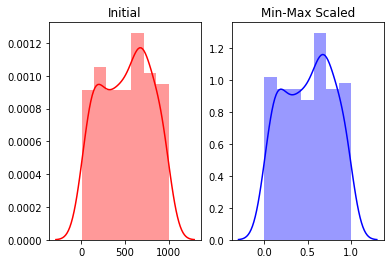

In [68]:
# distribution plot:
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0], color='red')
ax[0].set_title('Initial')

sns.distplot(df_scaled, ax=ax[1], color='blue')
ax[1].set_title('Min-Max Scaled')